In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
import random

In [0]:
from keras.layers import Flatten
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv2D

In [0]:
np.random.seed(0)

In [0]:
from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"


In [0]:
num_of_samples = []

In [0]:
cols = 5
num_classes = 10

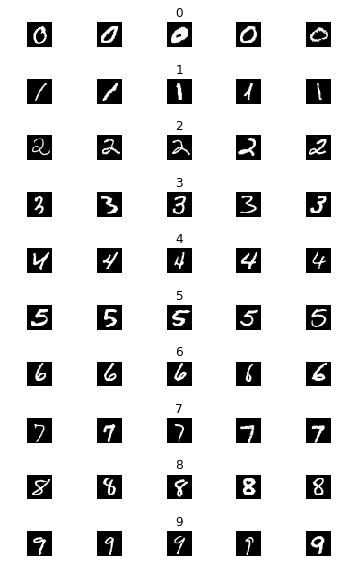

In [63]:
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

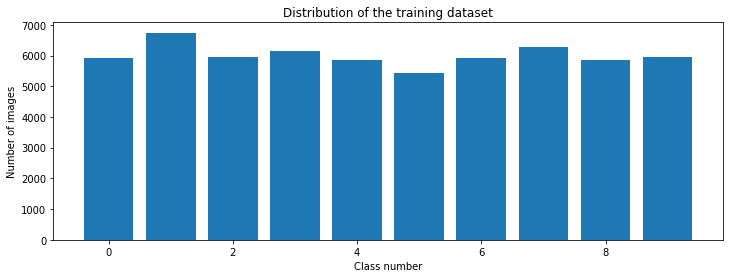

In [64]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")


In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:
X_train = X_train/255 
X_test = X_test/255

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [0]:
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [0]:
model = leNet_model()

In [70]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               188000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [71]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 48us/step - loss: 0.2293 - acc: 0.9306 - val_loss: 0.0507 - val_acc: 0.9833
Epoch 2/10
54000/54000 [==============================] - 2s 41us/step - loss: 0.0510 - acc: 0.9842 - val_loss: 0.0442 - val_acc: 0.9873
Epoch 3/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.0382 - acc: 0.9876 - val_loss: 0.0471 - val_acc: 0.9863
Epoch 4/10
54000/54000 [==============================] - 2s 39us/step - loss: 0.0322 - acc: 0.9898 - val_loss: 0.0386 - val_acc: 0.9898
Epoch 5/10
54000/54000 [==============================] - 2s 39us/step - loss: 0.0250 - acc: 0.9923 - val_loss: 0.0542 - val_acc: 0.9867
Epoch 6/10
54000/54000 [==============================] - 2s 38us/step - loss: 0.0235 - acc: 0.9922 - val_loss: 0.0570 - val_acc: 0.9865
Epoch 7/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.0248 - acc: 0.9918 - val_loss: 0.0433 - val_acc:

Text(0.5, 0, 'epoch')

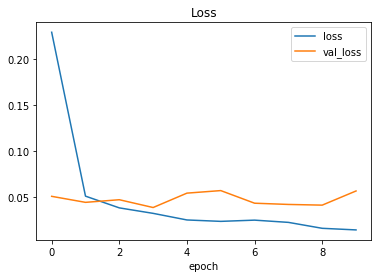

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

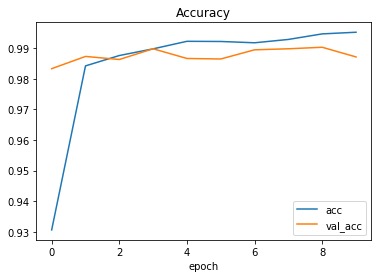

In [73]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [74]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])


<class 'list'>
Test score: 0.04713609877196682
Test accuracy: 0.988


In [0]:
import requests
from PIL import Image

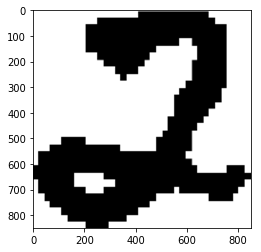

In [76]:
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [0]:
import cv2

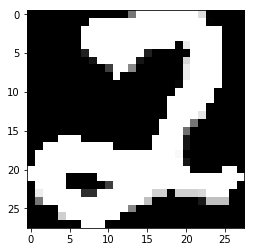

In [78]:
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [0]:
img = img/255
img = img.reshape(1,28,28,1)

In [80]:
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

predicted digit: [2]


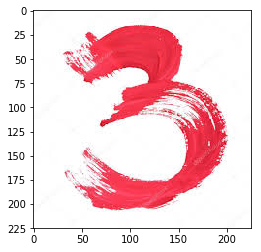

In [81]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

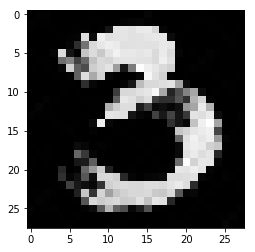

In [82]:
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [0]:
img = img/255
img = img.reshape(1,28,28,1)

In [84]:
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

predicted digit: [3]
